In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Iris dataset
iris = load_iris()
X = iris.data      # features (sepal length, sepal width, petal length, petal width)
y = iris.target    # labels (0 = setosa, 1 = versicolor, 2 = virginica)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Try KNN with different values of K
for k in [1, 3, 5, 7, 9]:
    print(f"\n=== K = {k} ===")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # 4. Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



=== K = 1 ===
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


=== K = 3 ===
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


=== 

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5)  # 5-fold CV
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9666666666666668


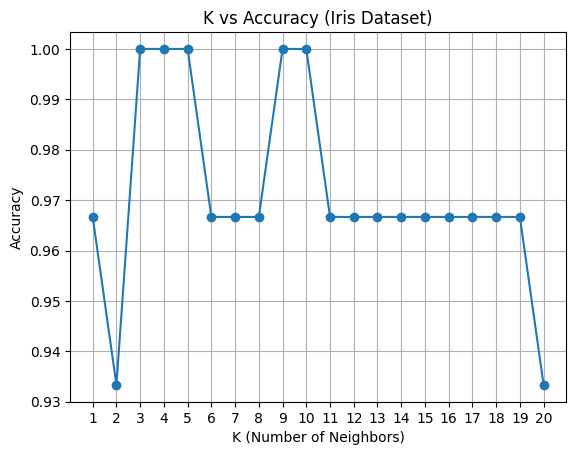

In [15]:
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy (Iris Dataset)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()
